In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_excel('../data/default of credit card clients.xls')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 24)

In [5]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

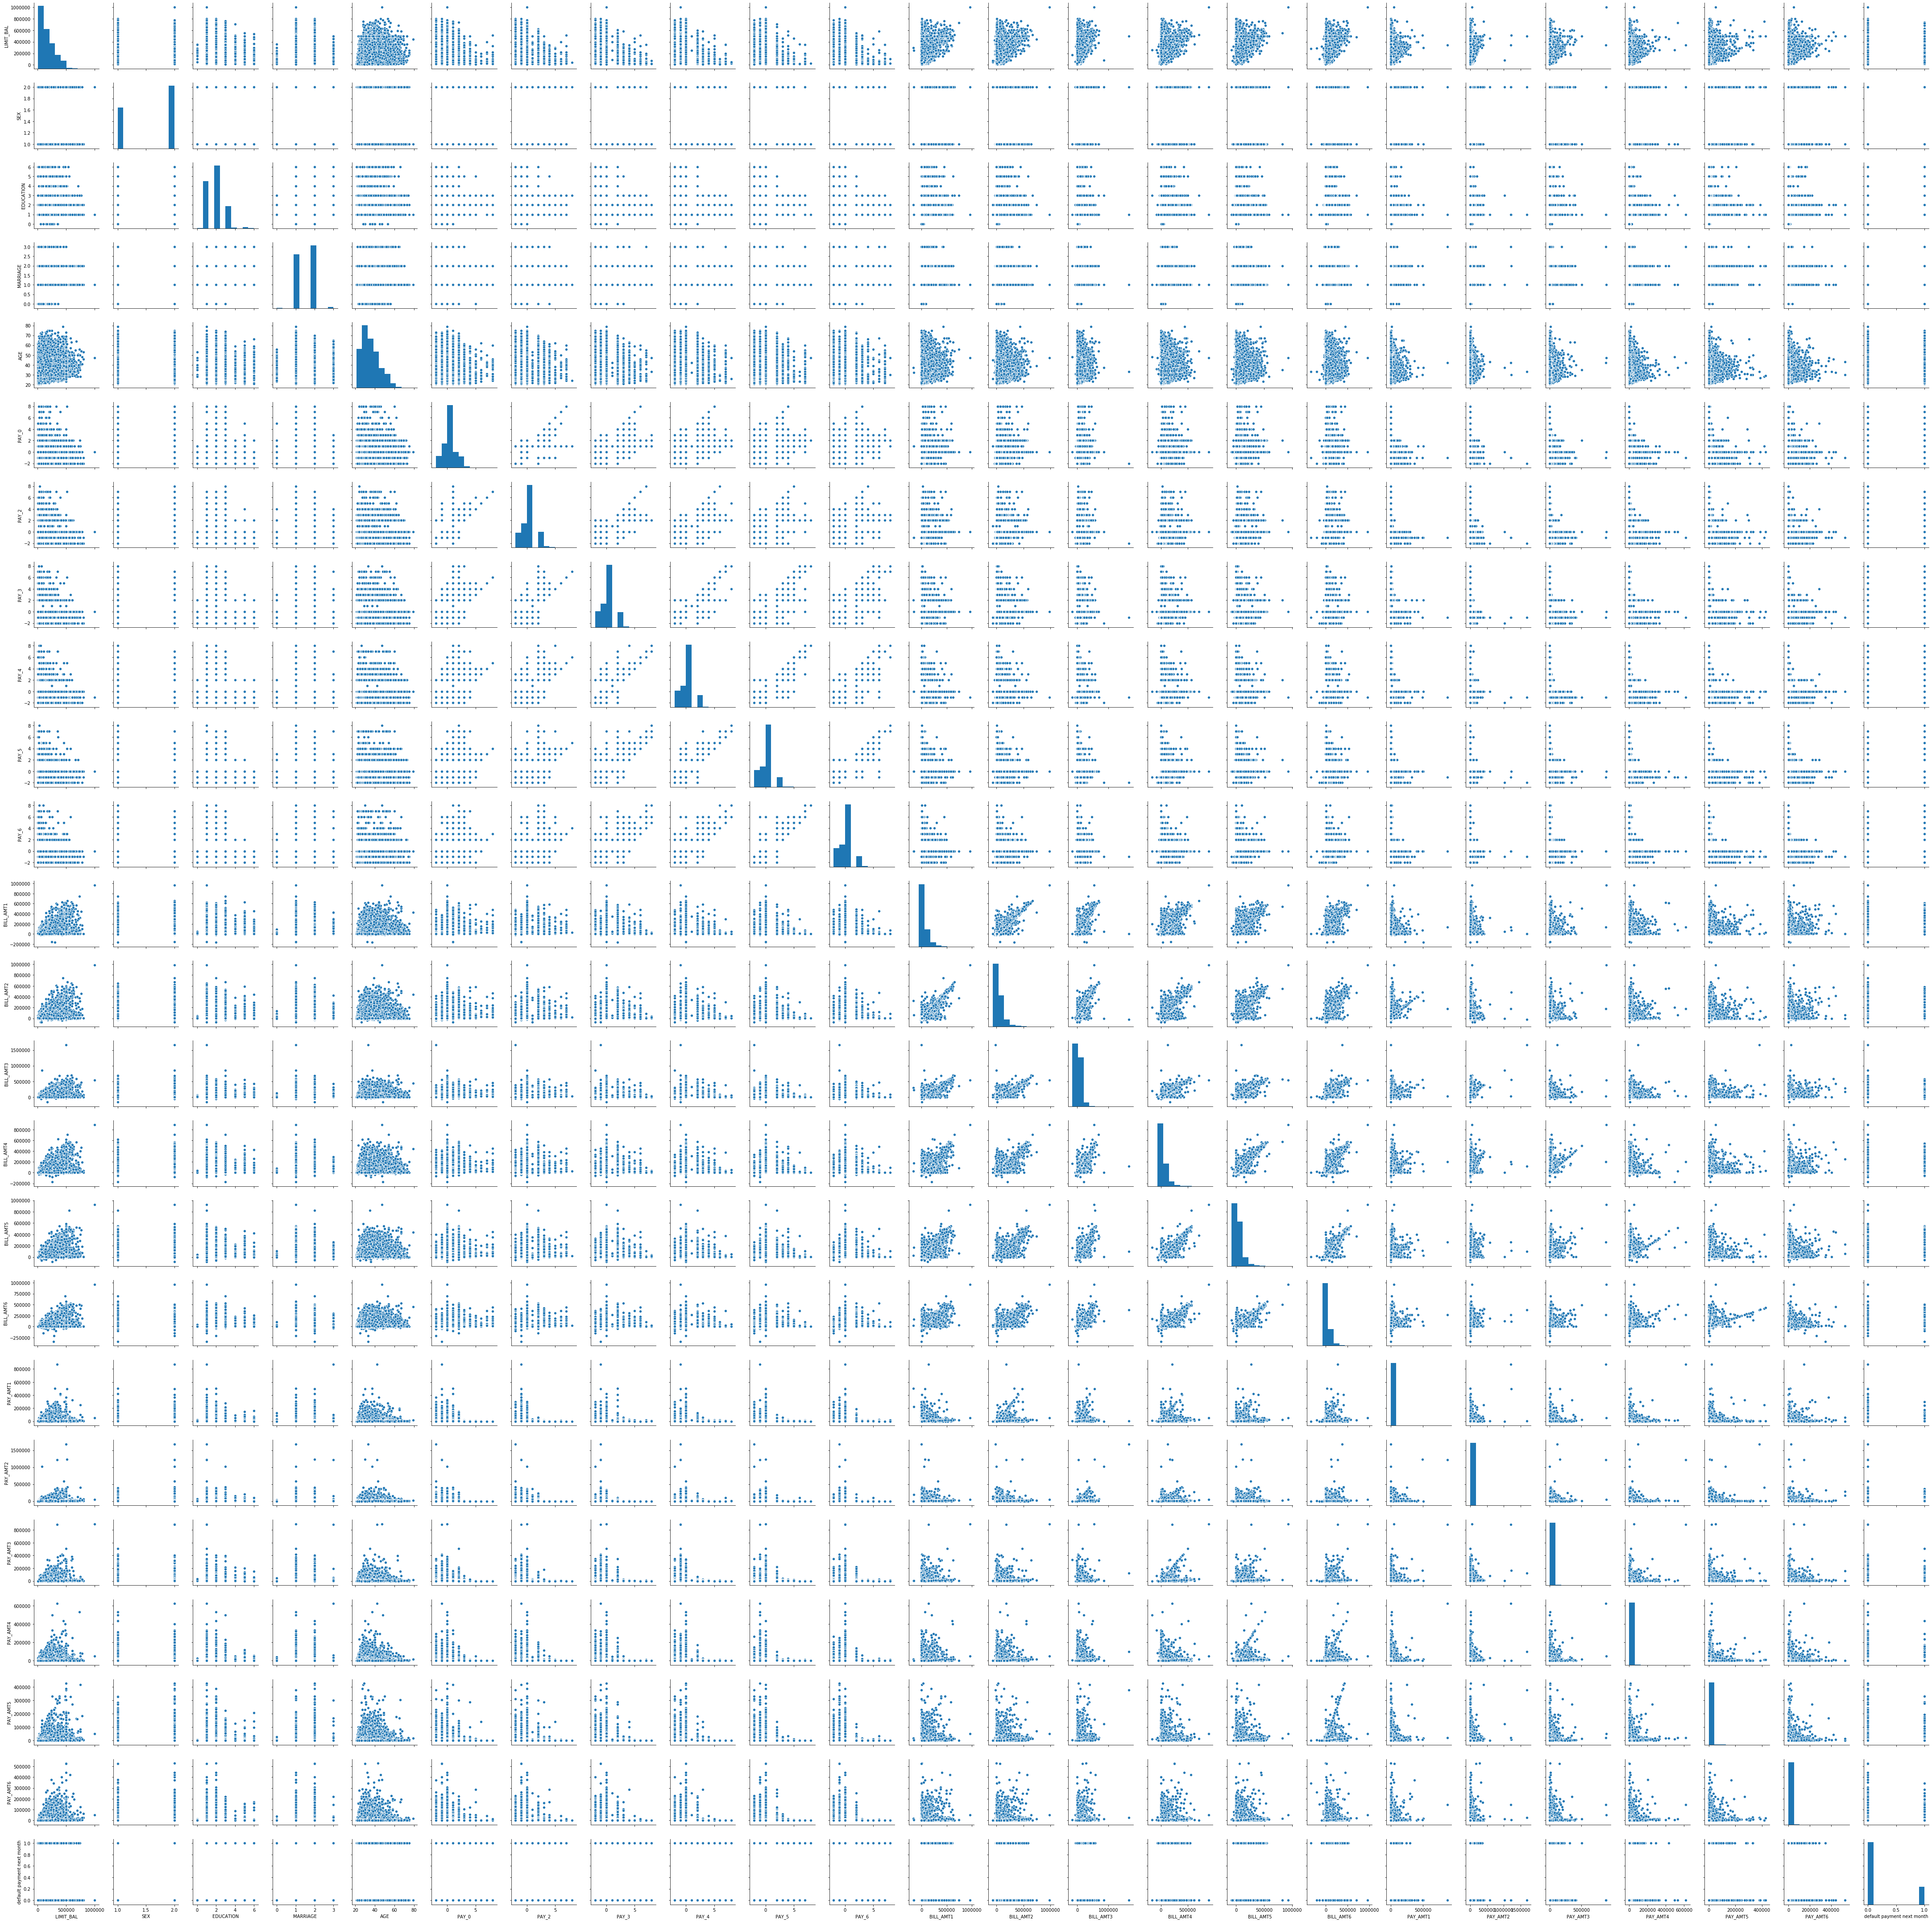

In [33]:
sns.pairplot(data)

From the pair-plot above, we can see that there is some relationship between the feature columns.
To confirm that we’d plot a correlation heatmap.


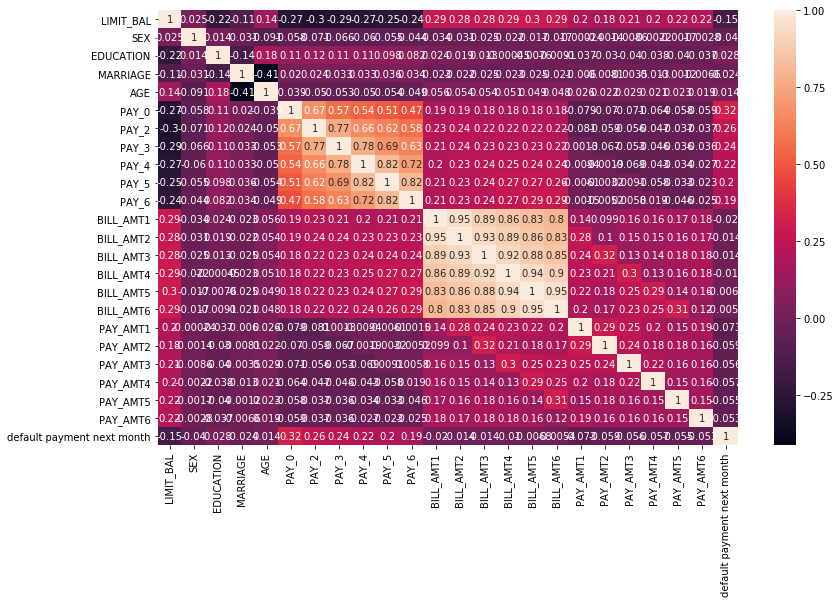

In [34]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True )

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 


In [6]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [37]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [38]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [39]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [40]:
scaled_train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,0.210169,-0.365093,-1.238563,1.448725,-1.054777,1.464785,0.015441,-0.724837,-0.697423,-0.668007,...,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621
4222,-1.243527,-1.061279,-1.238563,-1.073197,0.861786,0.271955,1.794063,0.110028,0.141588,0.189890,...,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573
8736,-0.723106,-0.597155,0.807387,0.187764,0.861786,0.380394,0.015441,0.110028,0.141588,0.189890,...,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511
27880,1.484011,-0.287739,0.807387,1.448725,-1.054777,-1.029313,0.015441,0.110028,1.819611,1.905684,...,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958
29290,1.646570,-0.906571,-1.238563,1.448725,0.861786,-1.029313,1.794063,0.110028,0.141588,0.189890,...,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889


In [35]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [41]:
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
ac=accuracy_score(y_test, pred_y)
ac

0.6601010101010101

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [47]:

#finding the best parameters
grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.579, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.662, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.714, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.648, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.689, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.667, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. var_smoothing=0.001, score=0.663, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.714, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.649, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.690, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.783, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] ................... var_smoothing=0.5, score=0.795, total=   0.0s
[CV] var_smoothing=0.5 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [48]:
grid.best_estimator_

GaussianNB(priors=None, var_smoothing=0.5)

In [49]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [51]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.7792929292929293

In [68]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [69]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 17.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130, 200],
                         'random_state': [0, 50, 100, 250, 355, 5

In [70]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [72]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [73]:
ac_xgb_new

0.8203030303030303